<a href="https://colab.research.google.com/github/rishiguptha54/amazon-sales/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Amazon Sales data.xlsx to Amazon Sales data (1).xlsx


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

## **Extracting Data as Data Frame**

In [9]:
df = pd.read_excel('Amazon Sales data.xlsx')
df


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


In [10]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


## **Top 5 Item Types Sold**

In [14]:
df['Item Type'].value_counts().head(5)


,count
Item Type,
Clothes,13
Cosmetics,13
Office Supplies,12
Fruits,10
Personal Care,10


## **Top 5 profit making countries**

In [20]:
df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(5)

,Total Profit
Country,
Djibouti,2425317.87
Myanmar,1802771.70
Pakistan,1719922.04
Samoa,1678540.98
Honduras,1609947.52


## **Total Profits Based on Regions**

In [23]:
df.groupby('Region')['Total Profit'].sum()

,Total Profit
Region,
Asia,6113845.87
Australia and Oceania,4722160.03
Central America and the Caribbean,2846907.85
Europe,11082938.63
Middle East and North Africa,5761191.86
North America,1457942.76
Sub-Saharan Africa,12183211.40


## **Sales Channels**

In [25]:
df['Sales Channel'].value_counts()

,count
Sales Channel,
Offline,50
Online,50


## **Analyzing Order Priority**

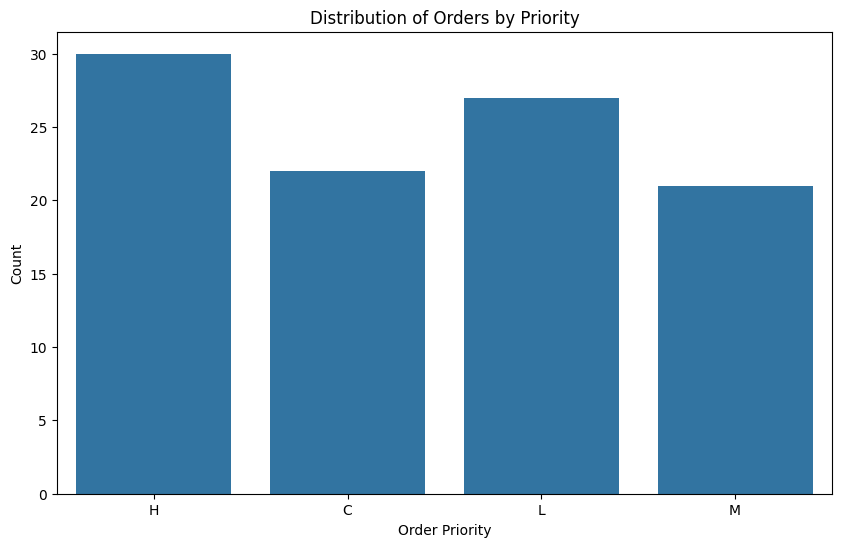

In [26]:
df['Order Priority'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Priority', data=df)
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.title('Distribution of Orders by Priority')
plt.show()


## **Shipping Time**

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df.sort_values(by='Shipping Time', ascending=False)[['Order Date', 'Ship Date', 'Shipping Time']]

,Order Date,Ship Date,Shipping Time
72,2011-05-26,2011-07-15,50
71,2015-08-14,2015-09-30,47
12,2017-01-13,2017-03-01,47
96,2011-11-11,2011-12-28,47
65,2013-10-11,2013-11-25,45
...,...,...,...
83,2011-01-04,2011-01-05,1
66,2012-07-08,2012-07-09,1
42,2012-06-07,2012-06-08,1
34,2017-02-25,2017-02-25,0


## **Visualizations**

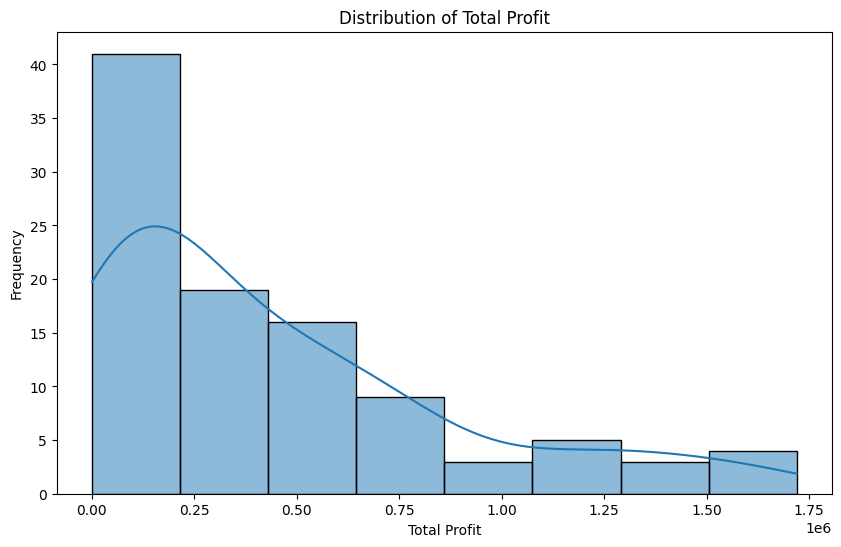

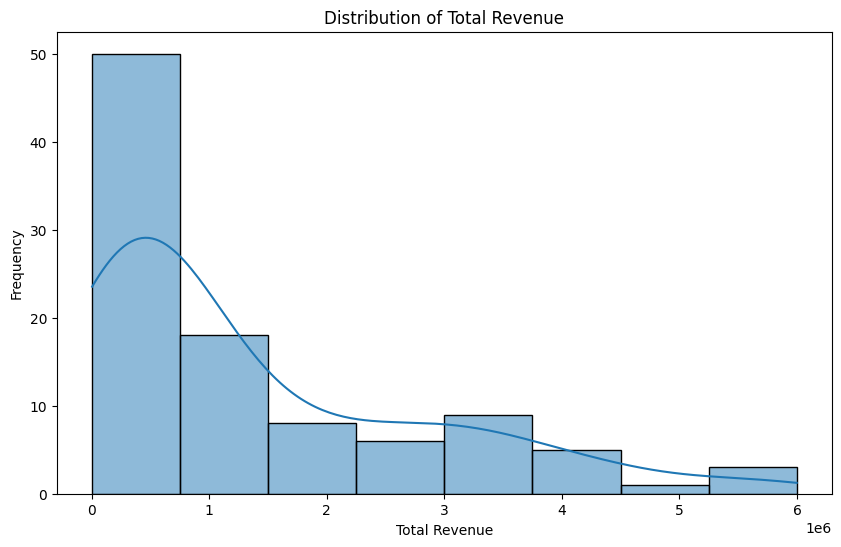

In [30]:
#profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Profit'], kde=True)
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Total Profit')
plt.show()

# Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Revenue'], kde=True)
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Total Revenue')
plt.show()


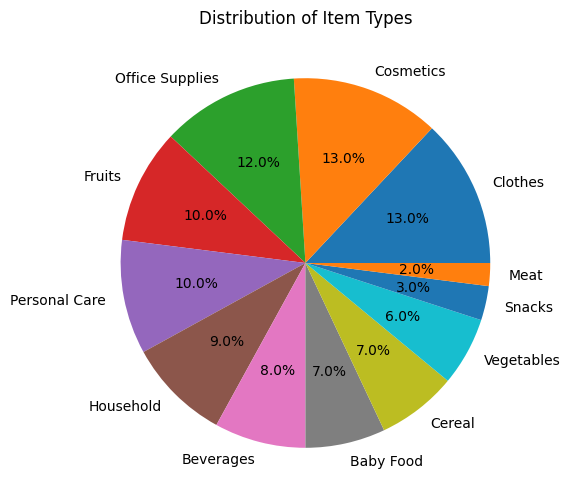

In [34]:
plt.figure(figsize=(10, 6))
df['Item Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Item Types')
plt.ylabel('')
plt.show()


In [36]:
!pip install plotly
import plotly.express as px

top_5_countries = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(5).index.tolist()
top_5_df = df[df['Country'].isin(top_5_countries)]

fig = px.funnel(top_5_df, x='Total Profit', y='Country')
fig.show()


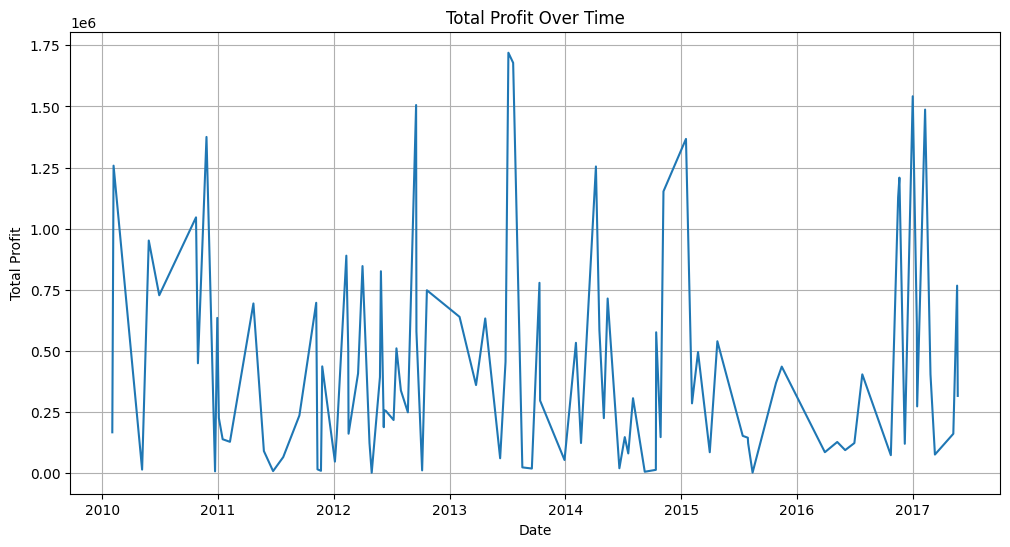

In [37]:
df_sorted = df.sort_values('Order Date')
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Order Date'], df_sorted['Total Profit'])
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.title('Total Profit Over Time')
plt.grid(True)
plt.show()
